In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-means

In [2]:
# Currently, this dataset is too short for cluster algorithms but the idea is to let it ready for bigger datasets.
# ** means is a parameter to be changed with different datasets

# Load Data
f_name = "LocationData/store_cordinates.csv"   # **
df_stores = pd.read_csv(f_name)

store_coordinates = df_stores[['X','Y']]
stores = df_stores[['X','Y','Lugar']]          # **


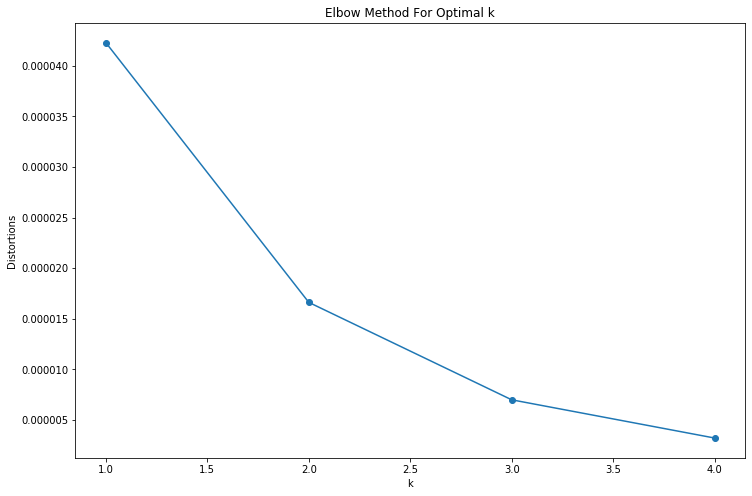

In [3]:
# Througth elbow method we determined an estimated number of clusters
distortions = []
K = range(1,5)    # **
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(store_coordinates)
    distortions.append(kmeansModel.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [4]:
# silhouette_score to evaluate dissimilarity

sil = []
kmax = 3    # ** Clusters

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(store_coordinates)
    labels = kmeans.labels_
    sil.append(silhouette_score(store_coordinates, labels, metric = 'euclidean'))
    
    
clusters = 3

In [5]:
#K-means algorithm
means = KMeans(n_clusters=clusters, init='k-means++')    # **
kmeans.fit(store_coordinates)
y = kmeans.labels_
print("k = 4", " silhouette_score ", silhouette_score(store_coordinates, y, metric='euclidean'))

k = 4  silhouette_score  0.29753425106811326


In [6]:
# Saving results in files
# This part generates clusters+1 files, 1 file per cluster and a file with k_means. 
# This can be changed to work with a databse directly.

# Add labels to dataset
k_labels = np.asarray(kmeans.labels_)
stores['cluster'] = k_labels


# Save K-means
k_means_matrix = np.asarray(kmeans.cluster_centers_)
df_means = pd.DataFrame(data=k_means_matrix, index= np.unique(k_labels), columns=["Longitude","Latitude"])
df_means.to_csv("LocationData/Results/k_means.csv")

# Save each store in their respective cluster
f_cluster = "LocationData/Results/Cluster_"
f_cluster_sufix = ".csv"

for i_index in np.unique(k_labels):
    file_name=f_cluster+str(i_index)+f_cluster_sufix
    cluster_query=stores.query("cluster=="+str(i_index))
    cluster_query.to_csv(file_name,index=False)



C:\Users\Lili\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Recommendation algorithm

In [7]:
# Load K-means since we only need the mean to evaluate which cluster is closer to a given coordinate

f_name = "LocationData/Results/k_means.csv"     # **
clusters_directory = "LocationData/Results/"
df_centers = pd.read_csv(f_name,index_col=0)



In [8]:
from geopy.distance import geodesic 

# Coordinate system must use WGS-84
class Recommendation:
    
    # f_name: Datasource file in CSV
    # cluster_directory: Directory that contains the clusters' data
    def __init__(self, f_name, cluster_directory):
        self.centers = pd.read_csv(f_name,index_col=0)
        
    def get_distance_list(self, coordinates):
        source = coordinates
        
        distance_list = list()
        # Calculate distance to means to find a cluster for searching
        for center in self.centers.values:
            target = (center[1],center[0])
            distance_list.append(geodesic(source, target, ellipsoid='WGS-84').km)  
            
        return distance_list
         
    # places: an integer that indicates the maximum number of places to be returned as recommendations
    def get_recommendation_list(self, places, latitude, longitud):
        coordinates = (latitude, longitud)
        distance_list = self.get_distance_list(coordinates)
        

In [9]:
rec=Recommendation(f_name,clusters_directory)
ll= rec.get_distance_list((20.67715178768269, -103.43001294075434))




In [10]:
ll

[0.725102620634625, 0.0900345829409648, 0.28558385570845934]